In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 40.5 MB/s 


In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [ ]:
pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers
from keras_tuner.tuners import RandomSearch
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Tetuan City power consumption.csv')
data

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone_1_Power_Consumption,Zone_2_Power_Consumption,Zone_3_Power_Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


BASIC EDA

In [ ]:
data.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone_1_Power_Consumption,Zone_2_Power_Consumption,Zone_3_Power_Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
data.tail()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone_1_Power_Consumption,Zone_2_Power_Consumption,Zone_3_Power_Consumption
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


In [ ]:
data.shape

(52416, 8)

In [ ]:
data.dtypes

Temperature                 float64
Humidity                    float64
Wind Speed                  float64
general diffuse flows       float64
diffuse flows               float64
Zone_1_Power_Consumption    float64
Zone_2_Power_Consumption    float64
Zone_3_Power_Consumption    float64
dtype: object

In [ ]:
data.count()

Temperature                 52416
Humidity                    52416
Wind Speed                  52416
general diffuse flows       52416
diffuse flows               52416
Zone_1_Power_Consumption    52416
Zone_2_Power_Consumption    52416
Zone_3_Power_Consumption    52416
dtype: int64

In [ ]:
data.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone_1_Power_Consumption,Zone_2_Power_Consumption,Zone_3_Power_Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature               52416 non-null  float64
 1   Humidity                  52416 non-null  float64
 2   Wind Speed                52416 non-null  float64
 3   general diffuse flows     52416 non-null  float64
 4   diffuse flows             52416 non-null  float64
 5   Zone_1_Power_Consumption  52416 non-null  float64
 6   Zone_2_Power_Consumption  52416 non-null  float64
 7   Zone_3_Power_Consumption  52416 non-null  float64
dtypes: float64(8)
memory usage: 3.2 MB


In [ ]:
data.duplicated()#checking the duplicates in the data

0        False
1        False
2        False
3        False
4        False
         ...  
52411    False
52412    False
52413    False
52414    False
52415    False
Length: 52416, dtype: bool

In [ ]:
p0 = data.Zone_3_Power_Consumption.min()
p100 = data.Zone_3_Power_Consumption.max()
q1 = data.Zone_3_Power_Consumption.quantile(0.25)
q2 = data.Zone_3_Power_Consumption.quantile(0.5)
q3 = data.Zone_3_Power_Consumption.quantile(0.75)
iqr = q3-q1

In [ ]:
lc = q1 - 1.5*iqr
uc = q3+1.5*iqr

In [ ]:
lc

387.16594500000065

In [ ]:
uc

34366.261105

In [ ]:
print("p0 = ",p0,",p100=",p100,",lc=",lc,",uc=",uc)

p0 =  5935.17407 ,p100= 47598.32636 ,lc= 387.16594500000065 ,uc= 34366.261105


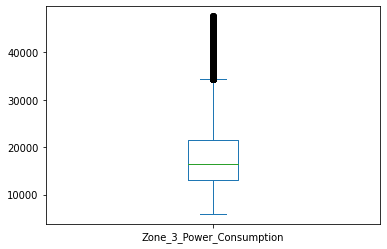

In [ ]:
data.Zone_3_Power_Consumption.plot(kind='box')

In [ ]:
data.Zone_3_Power_Consumption.clip(upper=uc)

0        20240.96386
1        20131.08434
2        19668.43373
3        18899.27711
4        18442.40964
            ...     
52411    14780.31212
52412    14428.81152
52413    13806.48259
52414    13512.60504
52415    13345.49820
Name: Zone_3_Power_Consumption, Length: 52416, dtype: float64

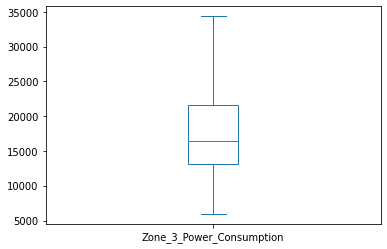

In [ ]:
data.Zone_3_Power_Consumption.clip(upper=uc,inplace=True)
data.Zone_3_Power_Consumption.plot(kind='box')

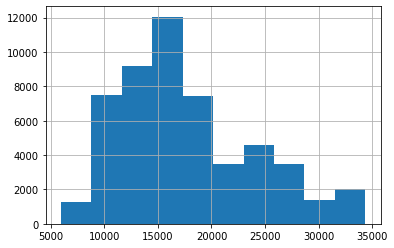

In [ ]:
data.Zone_3_Power_Consumption.hist()
plt.show()

In [ ]:
data.isna().sum()

Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone_1_Power_Consumption     0
Zone_2 _Power_Consumption    0
Zone_3 _Power_Consumption    0
dtype: int64

In [ ]:
X = data.iloc[:,0:7]
y = data.iloc[:,-1]


In [ ]:
X

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone_1_Power_Consumption,Zone_2 _Power_Consumption
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043
...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820
52412,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809
52413,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254
52414,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688


In [ ]:
y

0        20240.96386
1        20131.08434
2        19668.43373
3        18899.27711
4        18442.40964
            ...     
52411    14780.31212
52412    14428.81152
52413    13806.48259
52414    13512.60504
52415    13345.49820
Name: Zone_3 _Power_Consumption, Length: 52416, dtype: float64

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
def build_model(hp):
  model = keras.Sequential()
  for i in range(hp.Int('num_layers',2,20)):
    model.add(layers.Dense(units=hp.Int('units_'+str(i),min_value=32,max_value=512,
                                        step=32),
                           activation='relu'))
    model.add(layers.Dense(1,activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate',[1e-2,1e-3,1e-4])),
        loss='mean_absolute_error',
        metrics = ['mean_absolute_error'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective = 'val_mean_absolute_error',
    max_trials = 5,
    executions_per_trial = 3,
    directory = 'project',
    project_name = 'Power Consumption1')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(X_train,Y_train,epochs=5,validation_data=(X_test,Y_test))

Trial 5 Complete [00h 01m 03s]
val_mean_absolute_error: 3009.3788248697915

Best val_mean_absolute_error So Far: 2760.710693359375
Total elapsed time: 00h 05m 30s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in project/Power Consumption1
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 7
units_0: 352
learning_rate: 0.001
Score: 2760.710693359375
Trial summary
Hyperparameters:
num_layers: 15
units_0: 448
learning_rate: 0.01
Score: 2836.7770182291665
Trial summary
Hyperparameters:
num_layers: 5
units_0: 32
learning_rate: 0.001
Score: 2869.6886393229165
Trial summary
Hyperparameters:
num_layers: 19
units_0: 288
learning_rate: 0.0001
Score: 3003.3026529947915
Trial summary
Hyperparameters:
num_layers: 11
units_0: 288
learning_rate: 0.0001
Score: 3009.3788248697915
